In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
import os.path

In [27]:
scenarios_folder = os.path.expanduser('~/interscsimulator/scenarios/digital-rails-av-paulista/')
dr_events_filename_template = scenarios_folder + '{}/arrivals{}.xml'

In [28]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if (len(prefix) == 0 or (prefix in child.attrib['person'])):
            time = int(child.attrib['time'])
            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'time': time, 'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [29]:
def parse_crossings(crossings, scenario):
    crossing_stats = []
    
    for c in crossings:
        dr = parse_arrivals(dr_events_filename_template.format(scenario, ''), c)
        dr['avg_speed_m/s'] = dr['distance_m'] / dr['trip_time_s']
        dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
        dr = dr.drop(columns='distance_m')

        crossing_stats.append({
            'crossing': c,
            'count': dr['trip_time_s'].count(),
            'avg_time_s': dr['trip_time_s'].mean(),
            'std_time_s': dr['trip_time_s'].std(),
#             '50%_time_s': dr['trip_time_s'].median(),
#             'max_time_s': dr['trip_time_s'].max(),
#             'min_time_s': dr['trip_time_s'].min(),
#             'avg_speed_m/s': dr['avg_speed_m/s'].mean(),  
#             'avg_speed_km/h': dr['avg_speed_km/h'].mean(),   
        })
   
    return pd.DataFrame(crossing_stats).set_index('crossing')

## Full OSM capacity

- Too much traffic, avg speeds are overwhelmingly low

In [30]:
crossings = [
    'bela_cintra',
    'haddock_lobo', 
    'augusta_centro', 
    'augusta_bairro', 
    'rocha_azevedo',
    'peixoto_gomide', 
    'casa_branca', 
    'pamplona',
    'campinas',
    'joaquim_eugenio_de_lima',
    'brig_luis_antonio_centro',
    'brig_luis_antonio_bairro',
    'carlos_sampaio',
    'teixeira_da_silva',
    'oswaldo_cruz'
]

# df = parse_crossings(crossings, 'cross-full-cap_cet_0_0')
# df.head()

In [31]:
# drdf = parse_crossings(crossings, 'cross-full-cap_algo_0_0')
# drdf.head()

In [32]:
# cdf = pd.concat([df, drdf], axis=1, keys=['regular', 'dr'])
# cdf

In [33]:
# cdf.xs('avg_time_s', axis=1, level=1).plot(kind='bar', yerr=cdf.xs('std_time_s', axis=1, level=1))

## 50% OSM capacity

In [34]:
df2 = parse_crossings(crossings, 'cross-50pc-cap_cet_0_0')
df2.head()

avg_time_s  count  std_time_s
crossing                                     
bela_cintra      85.536667    900   29.851836
haddock_lobo    106.410000    300   35.845944
augusta_centro   93.392000    500   36.901026
augusta_bairro   94.384000    500   36.930859
rocha_azevedo    87.026667    300   35.254345

In [35]:
drdf2 = parse_crossings(crossings, 'cross-50pc-cap_algo_0_0')
drdf2.head()

avg_time_s  count  std_time_s
crossing                                     
bela_cintra      66.973333    900   17.363911
haddock_lobo     87.453333    300   23.609869
augusta_centro   83.946000    500   20.242594
augusta_bairro   82.954000    500   20.874179
rocha_azevedo    80.080000    300   23.119443

In [36]:
cdf2 = pd.concat([df2, drdf2], axis=1, keys=['regular', 'dr'])
cdf2

regular                           dr        \
                          avg_time_s count std_time_s  avg_time_s count   
crossing                                                                  
bela_cintra                85.536667   900  29.851836   66.973333   900   
haddock_lobo              106.410000   300  35.845944   87.453333   300   
augusta_centro             93.392000   500  36.901026   83.946000   500   
augusta_bairro             94.384000   500  36.930859   82.954000   500   
rocha_azevedo              87.026667   300  35.254345   80.080000   300   
peixoto_gomide             77.316667   300  36.774142   71.906667   300   
casa_branca                70.496667   300  37.031081   55.550000   300   
pamplona                   94.220000   300  36.428584   83.480000   300   
campinas                   72.656667   300  32.440098   60.203333   300   
joaquim_eugenio_de_lima    76.550000   300  34.094510   61.660000   300   
brig_luis_antonio_centro   86.776000   750  32.455009   77.394667   750   
brig_luis_antonio_bairro   76.608000   750  32.579220   64.652000   750   
carlos_sampaio            103.068889   900  40.551807  120.746667   900   
teixeira_da_silva          75.770000   300  32.987234   67.380000   300   
oswaldo_cruz               86.087778   900  45.051029   60.330000   900   

                                     
                         std_time_s  
crossing                             
bela_cintra               17.363911  
haddock_lobo              23.609869  
augusta_centro            20.242594  
augusta_bairro            20.874179  
rocha_azevedo             23.119443  
peixoto_gomide            23.609234  
casa_branca               22.541841  
pamplona                  27.115317  
campinas                  23.450553  
joaquim_eugenio_de_lima   21.964194  
brig_luis_antonio_centro  29.507963  
brig_luis_antonio_bairro  22.790161  
carlos_sampaio            39.378603  
teixeira_da_silva         23.689228  
oswaldo_cruz              20.926190

In [46]:
cdf2['regular']['count'].sum()

7600

Text(0,0.5,'Travel time (s)')

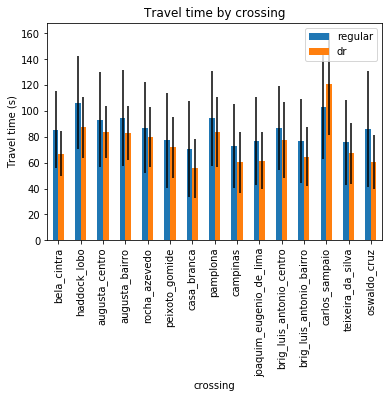

In [37]:
cdf2.xs('avg_time_s', axis=1, level=1).plot(
    kind='bar', title='Travel time by crossing', yerr=cdf2.xs('std_time_s', axis=1, level=1))
plt.ylabel('Travel time (s)')

Observations:
- Forbidden left turns at av. Paulista and how OSM maps them
- Low freespeeds at OSM

Questions:
- How digraph:minpath works?

Discussion:
- Maybe beta = 0.05 may not be a good choice:

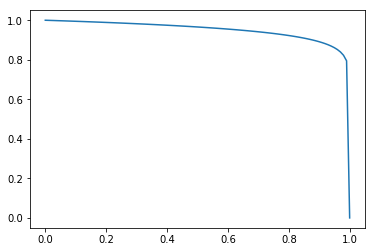

In [38]:
x = np.linspace(0, 1, 100)
y = np.power(1-x, 0.05)

plt.plot(x,y)
plt.show()

- beta = 0.45 seems better:

In [39]:
x = np.linspace(0, 1, 100)
y = np.power(1-x, 0.45)

plt.plot(x,y)
plt.show()

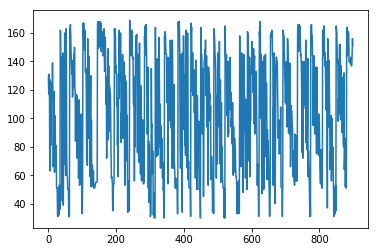

In [40]:
df = parse_arrivals(dr_events_filename_template.format('cross-50pc-cap_cet_0_0', ''), 'carlos_sampaio')
df.trip_time_s.plot()

In [41]:
df2 = parse_arrivals(dr_events_filename_template.format('cross-50pc-cap_algo_0_0', ''), 'carlos_sampaio')
df2.trip_time_s.plot()